# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

Começarei importando as bibliotecas que serao utilizadas ao longo do projeto.Em seguida, vou abrir os Dataframes em um editor de texto e analisar possiveis problemas de sintaxe e tabulação.Utilizarei os parametros da funçao read_csv() para obter uma boa visualização dos dados, corrigindo possiveis erros.
Feito isso, chamarei a função info() em cada Dataframe separadamente.


In [201]:
# Importe as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [202]:
# leia os conjuntos de dados em DataFra
orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
products = pd.read_csv('/datasets/products.csv',sep=';')
order_products = pd.read_csv('/datasets/order_products.csv',sep=';')
aisles = pd.read_csv('/datasets/aisles.csv',sep=';')
departments = pd.read_csv('/datasets/departments.csv',sep=';')

O resultado que indica que o DataFrame atualmente possui apenas uma coluna. Todas as informações (order_id, user_id, etc.) estão concatenadas em uma única string separada por ponto e vírgulas (;). Vamos corrigir isso
através do parametro sep.

In [203]:
# imprima as informações sobre o DataFrame
print(orders.info(show_counts=True))




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [204]:
# imprima as informações sobre o DataFrame
print(products.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [205]:
# imprima as informações sobre o DataFrame
print(order_products.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


In [206]:
# imprima as informações sobre o DataFrame
print(aisles.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [207]:
# imprima as informações sobre o DataFrame
print(departments.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


## Conclusões
 
Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

Ao abrir os Datafarames em um editor de texto, peçrcebi que todos estavam utlizando ';'
como delimitador, o que fazia com que todas as informaçoes aparecessem em uma unica coluna. Isso acontece
pois read_csv() utiliza como padrão sep=',' e logo nao reconhece ';' como delimitador.
Isso pode ser resolvido através da seguinte especificação: sep=';'

O parametro Show_counts =True foi chamado pois quando um DataFrame tem muitas linhas, info() não imprime as contagens de valores não nulos por padrão.



# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

Lidarei com os valores duplicados utilizando a função .duplicated() para vericá los.  

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [208]:
# Verificar se há pedidos duplicados
print(orders[orders.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

Há linhas duplicadas? Se sim, o que elas têm em comum?

Tem em comum o fato de que os pedidos foram feitos as 2 da madrugada de quarta feira.

In [209]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

orders_at_2am_wednesday = orders[(orders['order_hour_of_day'] == 2) & (orders['order_dow'] == 3)]
print(orders_at_2am_wednesday)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

O que esse resultado quer dizer?
Que temos muitos valores duplicados na coluna 'user_id'. 


In [210]:
print(type(orders))

<class 'pandas.core.frame.DataFrame'>


In [211]:
# Remova pedidos duplicados
orders.drop_duplicates()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [212]:
# Verifique as linhas duplicadas mais uma vez
print(orders[orders.duplicated()])



        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [213]:
# Verifique novamente apenas os IDs de pedidos duplicados
print(orders[orders.duplicated(subset=['order_id'])]['order_id'])

145574     794638
223105    2160484
230807    1918001
266232    1782114
273805    1112182
284038    2845099
311713    1021560
321100     408114
323900    1919531
345917    2232988
371905     391768
394347     467134
411408    1286742
415163    2282673
441599    2125197
Name: order_id, dtype: int64




Descreva brevemente suas conclusões e o que você fez com elas. 

Os resultados mostram que existem pedidos duplicados, pois as mesmas IDs de pedido (order_id) aparecem em mais de uma linha. As duplicatas são identificadas por orders.duplicated(subset=['orders_id']), que retorna as linhas com IDs repetidos. Esses IDs de pedidos se repetem no DataFrame, indicando que há múltiplas instâncias para os mesmos pedidos.

Utilizei o método duplicated(subset=['order_id']) para identificar apenas as linhas com IDs de pedidos repetidos.Após identificar as duplicatas, extraí apenas a coluna order_id para visualizar quais pedidos estavam sendo repetidos.



### DataFrame `products`

In [214]:
# Verifique se há linhas completamente duplicadas
print(products[products.duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [215]:
# Verifique apenas IDs dos produtos duplicados
print(products[products.duplicated(subset=['product_id'])])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [216]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
print(products[products['product_name'].str.lower().duplicated()])

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [217]:
# Verifique os nomes de produtos duplicados que não estão faltando
products[products['product_name'].str.lower().duplicated() & products['product_name'].notna()]

#O código isola os produtos que possuem nomes duplicados, mas apenas entre aqueles que possuem um nome válido (não nulo). Isso é útil para identificar produtos que podem ter sido cadastrados mais de uma vez por engano, mas desconsidera os registros onde o nome do produto não foi informado.

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Descreva brevemente suas conclusões e o que você fez com elas.

Pude observar que nao há linhas nem Ids de produtos duplicados. Porém há valores duplicados na coluna
'product_name'. 
Isolei apenas os produtos duplicados que possuem um valor nao nulo.


### DataFrame `departments`

In [218]:
# Verifique se há linhas completamente duplicadas
print(departments[departments.duplicated()])

Empty DataFrame
Columns: [department_id, department]
Index: []


In [219]:
# Verifique apenas se há IDs dos produtos duplicados
print(departments['department_id'].duplicated())
    
  

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: department_id, dtype: bool


Descreva brevemente suas conclusões e o que você fez com elas.

Após verificar o DataFrame em busca de valores duplicados através da função duplicates(), obtive 
Dataframes vazios e a codição boolena False como retorno. O que significa que não há linhas completamente duplicadas e nem valores duplicados na coluna 'department_id'.

### DataFrame `aisles`

In [220]:
# Verifique se há linhas completamente duplicadas
print(aisles[aisles.duplicated()])


Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [221]:
# Verifique apenas se há IDs dos produtos duplicados
print(aisles['aisle_id'].duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Name: aisle_id, Length: 134, dtype: bool


Descreva brevemente suas conclusões e o que você fez com elas.


Após verificar o DataFrame em busca de valores duplicados através da função duplicates(), obtive 
Dataframes vazios e a codição boolena False como retorno. O que significa que não há linhas completamente duplicadas e nem valores duplicados na coluna 'aisle_id'.

### DataFrame `order_products`

In [222]:
# Verifique se há linhas completamente duplicadas
print(order_products[order_products.duplicated()])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [223]:
# Verifique mais uma vez se há outros casos complicados de duplicados
print(order_products['order_id'].duplicated())


0          False
1          False
2          False
3          False
4          False
           ...  
4545002     True
4545003     True
4545004     True
4545005     True
4545006     True
Name: order_id, Length: 4545007, dtype: bool


## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [224]:
# Encontre valores ausentes na coluna 'product_name'
print(products[products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões.

Percebi que a coluna 'product_name' possui muitos valores ausentes.


In [225]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?
print(products[(products['product_name'].isna())&~(products['aisle_id']== 100)])


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Descreva brevemente suas conclusões.
O codigo que utilizei retorna todos os valores ausentes cujo 'aisle_id" seja diferente de 100.
Como resultado, temo um dataframe vazio. O que significa que todos os valores ausentes estao associados com o corredor de Id 100.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
Parabéns! Você tem bom raciocínio lógico!

</div>


In [226]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
print(products[(products['product_name'].isna())&~(products['department_id']==21)])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Descreva brevemente suas conclusões.

Fiz o mesmo processo que utilizei acima, como resultado, obtive um Dataframe vazio. O que significa que sim, todos os nomes de produtos ausentes estão associados com o departamento de ID 21.

In [227]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
print(aisles[aisles['aisle_id'].isin([100])],(departments[departments['department_id'].isin([21])]))

    aisle_id    aisle
99       100  missing     department_id department
20             21    missing


Descreva brevemente suas conclusões.

Os dados mostram que tanto o corredor com ID 100 quanto o departamento com ID 21 têm informações incompletas ou ausentes nos campos de nome. 

In [228]:
# Preencha nomes de produtos ausentes com 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
print(products[products['product_name'] =='Unknown'])  

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões e o que você fez com elas.

Os valores ausentes na coluna product_name foram preenchidos com 'Unknown' para 1.258 registros associados ao corredor com ID 100 e ao departamento com ID 21. Isso resolve a ausência de dados, mas indica que esses produtos podem ser genéricos ou incompletos.

### DataFrame `orders`

In [229]:
# Encontre os valores ausentes
print(orders.isna())


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0          False    False         False      False              False   
1          False    False         False      False              False   
2          False    False         False      False              False   
3          False    False         False      False              False   
4          False    False         False      False              False   
...          ...      ...           ...        ...                ...   
478962     False    False         False      False              False   
478963     False    False         False      False              False   
478964     False    False         False      False              False   
478965     False    False         False      False              False   
478966     False    False         False      False              False   

        days_since_prior_order  
0                        False  
1                        False  
2                       

In [230]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
print(orders[orders['order_number'] > orders.groupby('user_id')['order_number'].transform('min')].isna().sum())



order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

Não há valores ausentes no DataFrame, o que indica que todos os dados estão completos e prontos para análise ou processamento.

### DataFrame `order_products`

In [231]:
# Encontre os valores ausentes
print(order_products.isna())

         order_id  product_id  add_to_cart_order  reordered
0           False       False              False      False
1           False       False              False      False
2           False       False              False      False
3           False       False              False      False
4           False       False              False      False
...           ...         ...                ...        ...
4545002     False       False              False      False
4545003     False       False              False      False
4545004     False       False              False      False
4545005     False       False              False      False
4545006     False       False              False      False

[4545007 rows x 4 columns]


In [232]:
# Quais são os valores mínimo e máximo dessa coluna?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())


1.0
64.0


Descreva brevemente suas conclusões.

Os valores da coluna 'add_to_cart_order' variam de 1.0 a 64.0, mas precisamos checar se há valores ausentes na coluna.

In [233]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
orders_with_missing=order_products[order_products['add_to_cart_order'].isna()]
print(orders_with_missing)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [234]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem

# Identificar IDs de pedidos com valores ausentes em 'add_to_cart_order'
miss_cart_order_ids = sorted(list(order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()))

# Contar o número de produtos por pedido e verificar se todos têm mais de 64
product_count_per_order = order_products[order_products['order_id'].isin(miss_cart_order_ids)].groupby('order_id').size()
all_orders_have_more_than_64_products = product_count_per_order.min() > 64

print(f"Todos os pedidos com valores ausentes em 'add_to_cart_order' têm mais de 64 produtos? {all_orders_have_more_than_64_products}")


Todos os pedidos com valores ausentes em 'add_to_cart_order' têm mais de 64 produtos? True


In [235]:
# miss_cart_order_ids = sorted(list(order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()))
# order_products[order_products['order_id'].isin(miss_cart_order_ids)].groupby('order_id').size().sort_values()

Descreva brevemente suas conclusões. 

A resposta é não, há pedidos com uma quantidade menor de produtos.


In [236]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

# Substituir valores ausentes por 999
order_products['add_to_cart_order'].fillna(999, inplace=True)

# Converter a coluna para o tipo inteiro
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

# Verificar as alterações
print(order_products['add_to_cart_order'].head())


0    17
1     1
2     1
3    35
4     5
Name: add_to_cart_order, dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

Concluí que a coluna 'add_to_cart_order' possuía valores ausentes em alguns registros, indicando que o pedido não possuía uma sequência de ordem de adição ao carrinho especificada para esses produtos. Para lidar com esses valores ausentes, substituí-os por 999 como um valor distintivo que não interfere com as ordens padrão, garantindo a consistência dos dados. Em seguida, converti a coluna para o tipo integer, tornando-a mais adequada para análises numéricas e operações subsequentes.

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

Valores Ausentes em Produtos:
Identificamos que todos os produtos com nomes ausentes estavam associados ao corredor de ID 100 e ao departamento de ID 21, ambos categorizados como "missing". Substituímos os nomes de produtos ausentes por "Unknown" para garantir a consistência dos dados e facilitar a análise futura.

Pedidos com Dados Ausentes:
A coluna 'days_since_prior_order' apresentou valores nulos, que foram confirmados como ocorrendo exclusivamente em pedidos iniciais (primeira compra). Esses valores foram mantidos, pois são inerentes à lógica de dados e representam corretamente a ausência de um pedido anterior.

Pedidos com Produtos e Dados Faltantes:
Na tabela de produtos por pedido, a coluna 'add_to_cart_order' apresentou 836 valores ausentes. Todos os pedidos com esses valores foram analisados, e substituímos os nulos por 999 para diferenciar claramente os casos em que a ordem de adição ao carrinho não estava disponível. A coluna foi convertida para o tipo inteiro após a substituição.

Análise de Pedidos com Dados Ausentes:
Verificamos se todos os pedidos com valores ausentes na coluna 'add_to_cart_order' continham mais de 64 produtos. A análise demonstrou que nem todos esses pedidos atendem a essa condição, indicando uma diversidade no tamanho dos pedidos com dados ausentes.

Ações Tomadas
Corrigimos e padronizamos os dados ausentes para garantir integridade e qualidade.
Mantivemos os valores que são informativos por design (como os nulos no primeiro pedido).
Prepararmos os dados para análises futuras, eliminando inconsistências que poderiam afetar resultados analíticos.


# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [237]:
# Verificando a distribuição dos valores e identificando valores únicos
print(orders['order_hour_of_day'].value_counts())
print(orders['order_hour_of_day'].unique())



10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2      1004
3       770
4       765
Name: order_hour_of_day, dtype: int64
[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


In [238]:
print(orders['order_dow'].value_counts())
print(orders['order_dow'].unique())

0    84090
1    82185
2    65833
5    63488
6    62649
3    60912
4    59810
Name: order_dow, dtype: int64
[6 5 0 4 3 1 2]


Escreva suas conclusões aqui

Os valores fazem sentido.

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

In [239]:
# Agrupa por 'order_hour_of_day' e conta usuários únicos :

print(orders.groupby('order_hour_of_day')['user_id'].nunique())

order_hour_of_day
0      2991
1      1671
2       958
3       744
4       735
5      1281
6      3757
7     10993
8     20268
9     28112
10    32195
11    32660
12    31754
13    32433
14    32797
15    32894
16    31579
17    26825
18    21795
19    17026
20    12891
21     9806
22     7670
23     5167
Name: user_id, dtype: int64


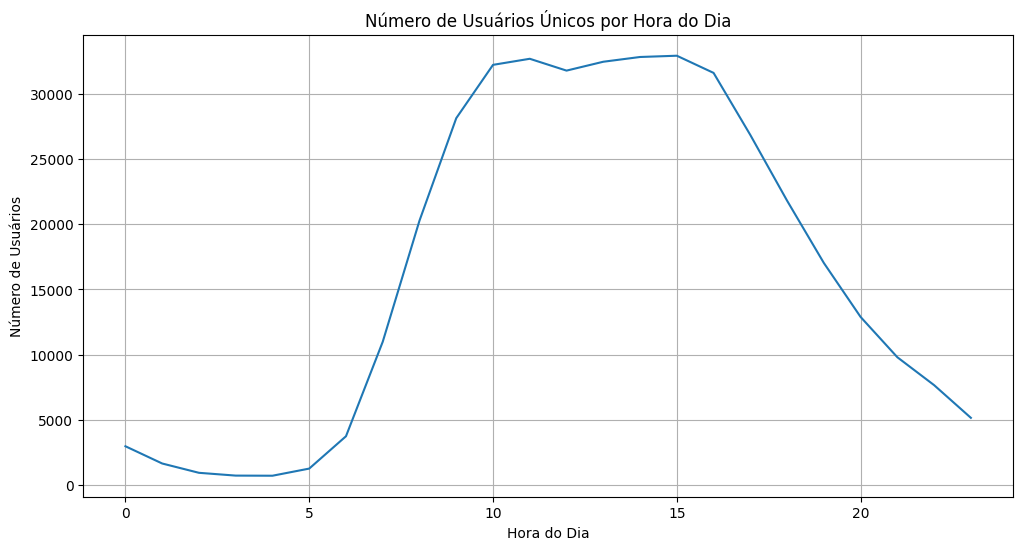

In [240]:

import seaborn as sns

hourly_users = orders.groupby('order_hour_of_day')['user_id'].nunique()

# Criando o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_users.index, y=hourly_users.values)
plt.title('Número de Usuários Únicos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Usuários')

plt.grid(True)
plt.show()

Escreva suas conclusões aqui

A maior parte dos pedidos ocorre dentro do horário comercial.

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

In [241]:
print(orders.groupby('order_dow')['order_id'].count())

order_dow
0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
Name: order_id, dtype: int64


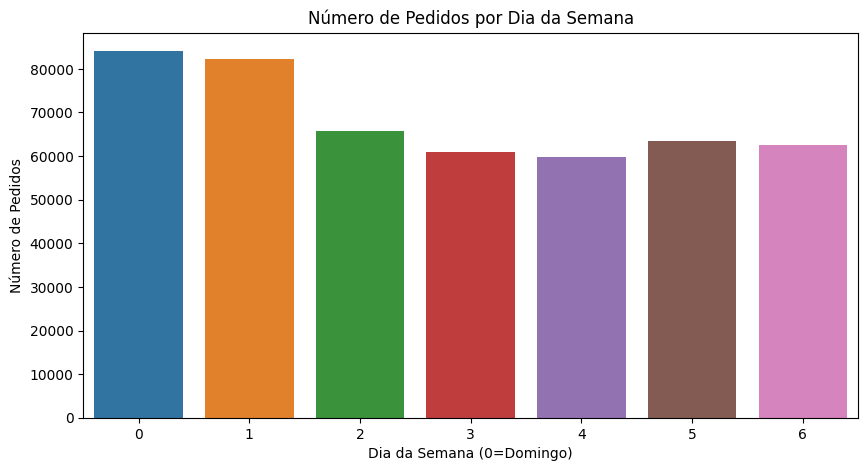

In [242]:
daily_orders = orders.groupby('order_dow')['order_id'].count()

# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_orders.index, y=daily_orders.values)
plt.title('Número de Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana (0=Domingo)')
plt.ylabel('Número de Pedidos')
plt.show()

Escreva suas conclusões aqui

Os dias com maiores vendas são domingo e segunda feira. 

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

Há uma demora de até no maximo 30 dias entre um pedido e outro.

In [243]:
print(orders['days_since_prior_order'].min())
print(orders['days_since_prior_order'].max())

0.0
30.0


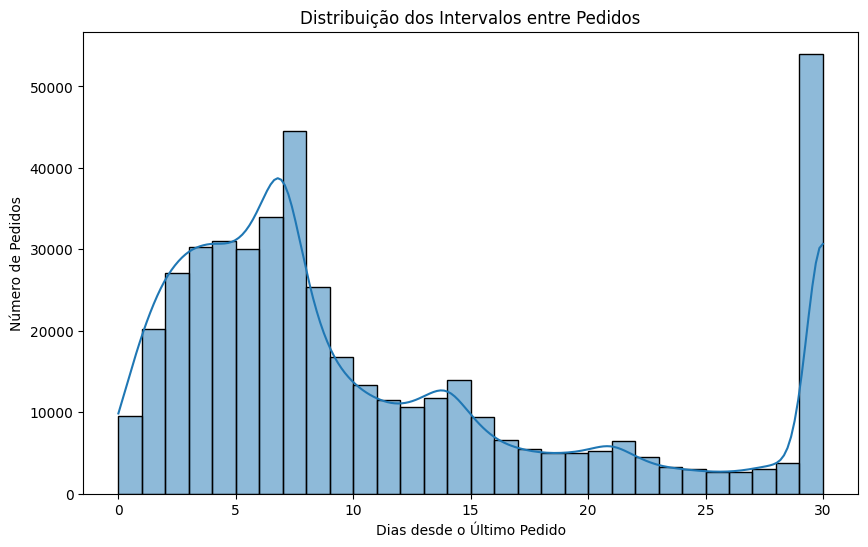

In [244]:
# Histograma dos intervalos entre pedidos
plt.figure(figsize=(10, 6))
sns.histplot(data=orders, x='days_since_prior_order', bins=30, kde=True)
plt.title('Distribuição dos Intervalos entre Pedidos')
plt.xlabel('Dias desde o Último Pedido')
plt.ylabel('Número de Pedidos')
plt.show()

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [245]:
print(orders[orders['order_dow'] == 3])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
6        2511640   148233            40          3                  8   
16       3109465    55090            19          3                 15   
28        133707   182261             1          3                 10   
30       1890318   193501             3          3                 15   
35        125325   106853             6          3                 19   
...          ...      ...           ...        ...                ...   
478917    972799    89702             4          3                  7   
478946   2406747    63101            11          3                  8   
478956    640934    27104             9          3                 10   
478963   3270802   112087             2          3                 13   
478965    216274     4391             3          3                  8   

        days_since_prior_order  
6                          2.0  
16                         9.0  
28                      

In [246]:
print(orders[orders['order_dow'] == 6])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
11        102585   191558            18          6                 16   
14       2843219    74699             4          6                 11   
20         50934   178510             9          6                  9   
26       1844247   122558             4          6                 18   
...          ...      ...           ...        ...                ...   
478924   3274344   145367            13          6                 10   
478930    489820     7287            14          6                 19   
478943    548902     6829             3          6                 10   
478954    984024    47076             2          6                 21   
478961   3006133    34561             7          6                 10   

        days_since_prior_order  
0                         30.0  
11                         8.0  
14                      

<function matplotlib.pyplot.show(close=None, block=None)>

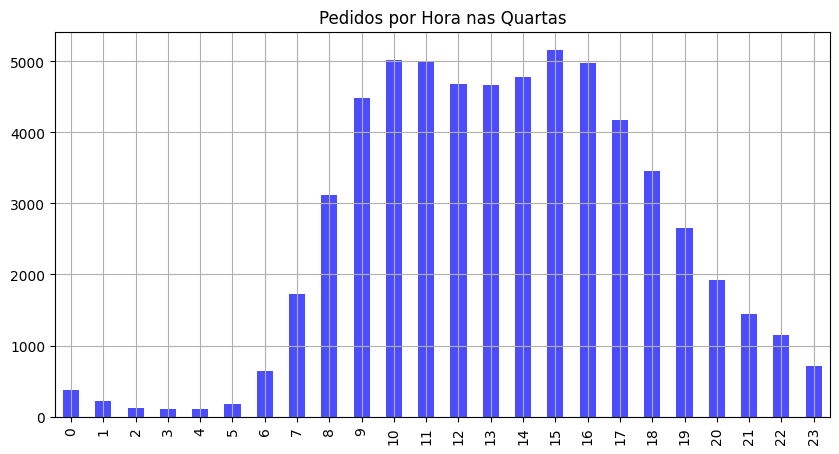

In [247]:
orders[orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', title='Pedidos por Hora nas Quartas', figsize=(10, 5), color='blue', alpha=0.7, grid=True)
plt.show

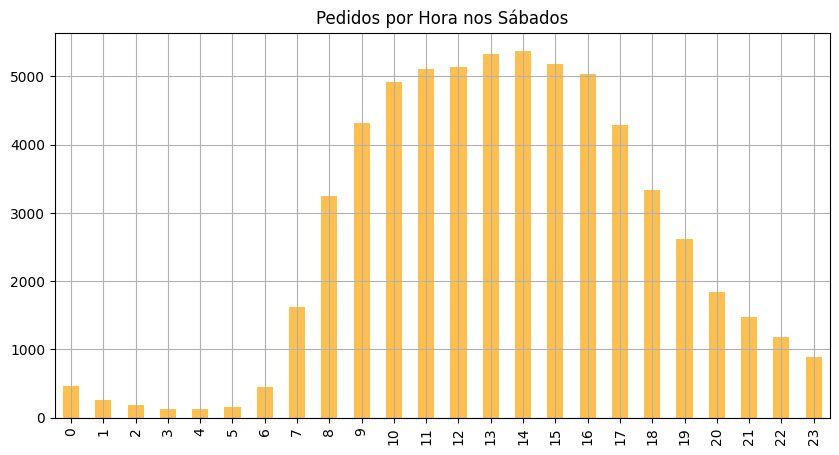

In [248]:
orders[orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', title='Pedidos por Hora nos Sábados', figsize=(10, 5), color='orange', alpha=0.7, grid=True)
plt.show()

Escreva suas conclusões aqui

No sábado o consumo é maior do que na quarta.

### [B2] Qual é a distribuição do número de pedidos por cliente?

In [249]:
print(orders[orders['order_dow'] == 3].groupby('user_id')['order_id'].count())

user_id
4         1
6         1
7         1
21        1
27        2
         ..
206189    1
206193    2
206201    1
206206    1
206208    1
Name: order_id, Length: 45331, dtype: int64


In [250]:
print(orders[orders['order_dow'] == 6].groupby('user_id')['order_id'].count())

user_id
11        1
13        3
16        1
17        2
22        1
         ..
206197    1
206201    1
206206    1
206207    1
206208    2
Name: order_id, Length: 45604, dtype: int64


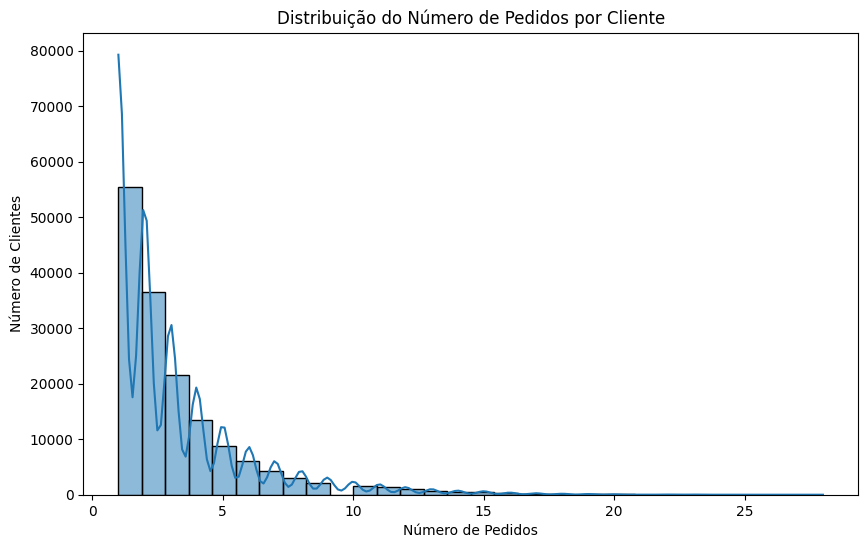

In [251]:
#Agrupando os dados por usuário e contando os pedidos
orders_per_user = orders.groupby('user_id')['order_id'].count()

# Criando o histograma
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_user, bins=30, kde=True)
plt.title('Distribuição do Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.show()

Escreva suas conclusões aqui

Embora o consumo seja maior no sábado, essa diferença nao é tão expressiva. Porém, podemos reparar que isso se dá devido ao fato de que os pedidos por cliente aumentam.



### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [252]:
# Mesclando os DataFrames com base na coluna 'product_id'
df_merged = order_products.merge(products, on='product_id')


In [253]:
# Agrupando por produto e contando as ocorrências
popular_products = df_merged.groupby('product_name')['order_id'].count().sort_values(ascending=False)


In [254]:
# Exibindo os nomes e ids dos 20 produtos mais populares
print(popular_products.head(20))

product_name
Banana                      66050
Bag of Organic Bananas      53297
Organic Strawberries        37039
Organic Baby Spinach        33971
Organic Hass Avocado        29773
Organic Avocado             24689
Large Lemon                 21495
Strawberries                20018
Limes                       19690
Organic Whole Milk          19600
Organic Raspberries         19197
Organic Yellow Onion        15898
Organic Garlic              15292
Organic Zucchini            14584
Organic Blueberries         13879
Cucumber Kirby              13675
Organic Fuji Apple          12544
Organic Lemon               12232
Apple Honeycrisp Organic    11993
Organic Grape Tomatoes      11781
Name: order_id, dtype: int64


Escreva suas conclusões aqui

A lista é dominada por frutas, especialmente frutas orgânicas, indicando uma forte preferência dos clientes por opções saudáveis e naturais. Principalmente por bananas, independentemente da opção orgânica.

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [255]:
# Agrupar por pedido e contar itens
items_per_order = order_products.groupby('order_id')['product_id'].count()

In [256]:
# Calcular estatísticas descritivas
print(items_per_order.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


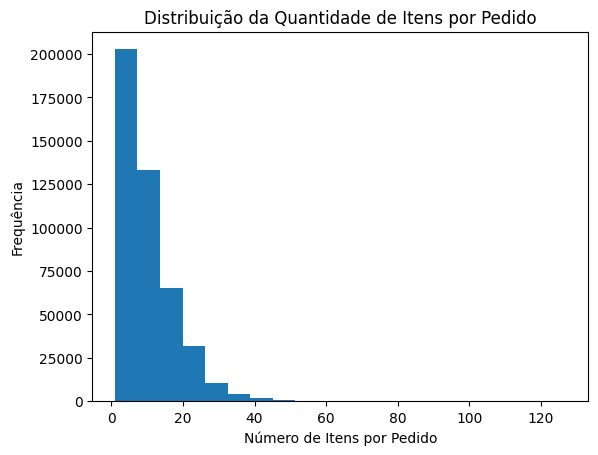

In [257]:
#Vamos criar um histograma para visualizar a distribuição da quantidade de itens por pedido. Isso nos permitirá identificar se a distribuição é normal ou assimetrica.

plt.hist(items_per_order, bins=20)
plt.xlabel('Número de Itens por Pedido')
plt.ylabel('Frequência')
plt.title('Distribuição da Quantidade de Itens por Pedido')
plt.show()

In [258]:
# O histograma  sugere uma distribuição assimétrica à direita. Isso significa que a maioria dos pedidos possui um número menor de itens, mas há uma cauda longa para a direita, indicando que alguns pedidos possuem um número muito maior de itens.
# A média é sensível a valores extremos. Neste caso, os pedidos com um número muito grande de itens podem "puxar" a média para cima, superestimando o número típico de itens por pedido. 
# A mediana, por sua vez, representa o valor central dos dados, não sendo influenciada por valores extremos.Sendo ideal para usarmos no caso acima.

In [259]:
# Calculando a mediana
median = items_per_order.median()

print("A mediana da quantidade de itens por pedido é:", median)


A mediana da quantidade de itens por pedido é: 8.0


Escreva suas conclusões aqui 

   A maioria dos pedidos possui um número relativamente pequeno de itens, com a mediana em torno de 8 itens. Isso sugere que muitos clientes fazem compras frequentes, mas com volumes menores, possivelmente para reposição de itens básicos ou compras de emergência.
   A distribuição da quantidade de itens por pedido é assimétrica à direita, indicando a presença de uma minoria de pedidos com um número significativamente maior de itens.


### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [260]:
# Filtrando pedidos repetidos por usuário
repeated_orders = order_products[order_products['order_id'].isin(orders[orders['user_id'].duplicated(keep='first')]['order_id'])]

In [261]:
# Contando a frequência de cada produto em pedidos repetidos
product_counts = repeated_orders['product_id'].value_counts()

In [262]:
# Obter os 20 produtos mais frequentes
top_20_products = product_counts.head(20)

In [263]:
# Associando IDs aos nomes dos produtos
top_20_products_with_names = pd.merge(top_20_products, products, left_index=True, right_on='product_id')

print(top_20_products_with_names)

       product_id  product_id_x  product_id_y              product_name  \
24851       24852         45750         24852                    Banana   
13175       13176         38039         13176    Bag of Organic Bananas   
21136       21137         26653         21137      Organic Strawberries   
21902       21903         23536         21903      Organic Baby Spinach   
47208       47209         21419         47209      Organic Hass Avocado   
47765       47766         16535         47766           Organic Avocado   
47625       47626         14409         47626               Large Lemon   
27844       27845         14304         27845        Organic Whole Milk   
27965       27966         13999         27966       Organic Raspberries   
26208       26209         13593         26209                     Limes   
16796       16797         13515         16797              Strawberries   
22934       22935         11217         22935      Organic Yellow Onion   
24963       24964        

Escreva suas conclusões aqui

Notamos novamente a preferencia por opições organicas e saudaveis.

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [264]:
# Mesclando os DataFrames
df_merge = order_products.merge(products, on='product_id')

In [265]:
# Calculando a taxa de repetição
reorder_rate = df_merge.groupby(['product_id', 'product_name'])['reordered'].mean()

In [266]:
# Imprimindo os resultados
print(reorder_rate)

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

Escreva suas conclusões aqui

 Os dados sugerem que o comportamento de compra dos clientes é, em grande parte, previsível. Ao identificar os produtos mais populares, é possível antecipar a demanda e otimizar as operações.

In [267]:
# df_merge = order_products.merge(products)
# reorder_rate = df_merge.groupby(['product_id', 'product_name'])['reordered'].mean()
# reorder_rate

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [268]:
# Mesclando os DataFrames
df_merge = order_products.merge(orders, on='order_id')

In [269]:
# Calculando a porcentagem de pedidos repetidos para cada usuário
reorder_pct = df_merge.groupby('user_id')['reordered'].mean() 

print(reorder_pct)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


Escreva suas conclusões aqui

Podemos notar atraves do resultado acima, clientes fieis a dterminadas marcas. Clientes com alta taxa de repetição podem vir a ser alvo de programas de fidelidade.

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [277]:
# Mesclando os DataFrames:
df_merge = order_products.merge(products)

In [278]:
# Filtrando para os produtos adicionados primeiro ao carrinho
first_in_cart = df_merge[df_merge['add_to_cart_order'] == 1]


In [279]:
# Obter os 20 primeiros itens mais frequentes
first_count = first_in_cart.groupby(['product_id', 'product_name'])['product_id'].count().sort_values(ascending=False)

print(first_count)

product_id  product_name                                               
24852       Banana                                                         15562
13176       Bag of Organic Bananas                                         11026
27845       Organic Whole Milk                                              4363
21137       Organic Strawberries                                            3946
47209       Organic Hass Avocado                                            3390
                                                                           ...  
10981       Cloud White Decorating Cupcake Icing                               1
10985       Premium Twin Pack Rock Cornish Game Hen                            1
38272       Organic Raw Coconut Flour                                          1
10989       Garbage Disposal Freshener & Cleaner Red Pear with Magnolia        1
36996       Cool Sport Spray-On Sunscreen SPF 50                               1
Name: product_id, Length: 26760, dtyp

In [ ]:
# df_merge = order_products.merge(products)
# first_in_cart = df_merge[df_merge['add_to_cart_order'] == 1]
# first_count = first_in_cart.groupby(['product_id', 'product_name'])['product_id'].count().sort_values(ascending=False)
# first_count

Escreva suas conclusões aqui

Podemos notar que muitos clientes iniciam suas compras pelos itens saudaveis e organicos, as bananas, independo de organicas ou
nao, lideram por aqui.

# Conclusão geral do projeto:

    Resumo das Conclusões:

    Foco em produtos frescos e saudáveis: A predominância de frutas, verduras e opções orgânicas indica que os clientes do Instacart buscam uma alimentação mais saudável e natural.

    Conveniência: A alta demanda por frutas como banana e abacate sugere que os clientes valorizam produtos práticos e que se encaixam em um estilo de vida agitado.
Consciência ambiental: A preferência por produtos orgânicos demonstra uma preocupação com a sustentabilidade e a qualidade dos alimentos.
Diversidade na escolha: A variedade de frutas e legumes indica que os clientes buscam opções diferentes para suas refeições.
Possíveis Implicações para o Instacart:

    Marketing:
Criar campanhas que destaquem os benefícios para a saúde de uma alimentação baseada em frutas e verduras.
Promover a praticidade dos produtos oferecidos, como kits de receitas ou sugestões de combinações de alimentos.
Enfatizar o compromisso da empresa com a sustentabilidade e o bem-estar dos clientes.

    Gerenciamento de produtos:
Ampliar a oferta de produtos orgânicos e frescos.
Priorizar a reposição de produtos populares, como bananas, morangos e abacates.
Explorar novas categorias de produtos que se alinhem com as preferências dos clientes, como superalimentos e produtos veganos.

    Personalização:
Utilizar os dados de compra para oferecer recomendações personalizadas de produtos.
Criar listas de compras personalizadas com base no histórico de compras do cliente.

    Experiência do usuário:
Otimizar a interface do aplicativo para facilitar a busca e a compra de produtos frescos.
Oferecer opções de entrega mais flexíveis, como horários agendados e pontos de retirada.